In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from matplotlib import rc
import pandas as pd
import os.path as path
import urllib.request

In [4]:
file = 'InterpolacionLagrange.csv'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'
if not path.exists(file):
    Path_ = urllib.request.urlretrieve(url,file)
else:
    print('---File Found---')
    Path_ = file

---File Found---


In [5]:
Data = pd.read_csv(Path_,sep=',')

In [6]:
Data

,X,Y
0,1.4,0.400795
1,3.5,0.594128
2,5.6,0.298028


In [7]:
x_values = np.float64(Data['X'])
y_values = np.float64(Data['Y'])

In [8]:
def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod

In [9]:
def Poly(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
        
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

In [32]:
x = np.linspace(0,6,100)
y = Poly(x,x_values,y_values)

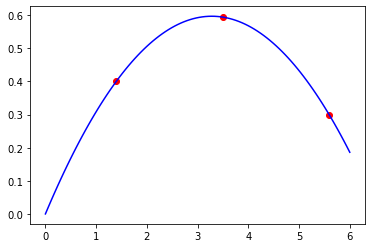

In [36]:
plt.scatter(x_values,y_values,color='red')
plt.plot(x,y,color='blue')

$$ {y} = y_{0} + v_{0y} t + \frac{1} {2} g t^{2} $$
$$ {x} = x_{0} + v_{ox} t $$

$$ v_{y} = v_{0y} + g t^{2} $$

$$ \theta = arcsin \left( {\frac {v_{y}} {v}} \right) $$

In [12]:
x = sym.Symbol('x')
f = Poly(x,x_values,y_values)

In [24]:
f = sym.simplify(f)
f

-0.0554912422401579*x**2 + 0.363970234266202*x + 2.77555756156289e-17

In [14]:
coeff_2 = f.coeff(x**2)
coeff_1 = f.coeff(x)
g = -9.8

In [17]:
#coeff_2*(t**2) + coeff_1*t

In [18]:
y_values[0]

0.4007954931819738

In [19]:
coeff_2*(1.4**2) + coeff_1*1.4

0.400795493181974